<a href="https://colab.research.google.com/github/mohit0412/data/blob/main/Flower_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flower Data Analysis

# 1. Import the required libraries

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.backend import dropout
from tensorflow.keras import regularizers
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# 2. Data Acquisition  -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [ ]:
# Downloading the dataset using tensflow datasets package.
flower_data, metadata = tfds.load('tf_flowers', split='train', as_supervised=True,with_info=True)

In [ ]:
# separating feature and target variable.
tensor_image, tensor_label = [],[]
for example, label in flower_data:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  tensor_image.append(example)
  tensor_label.append(label)

In [ ]:
# printing metadata for the flower data.
metadata

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='/root/tensorflow_datasets/tf_flowers/3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)

## 2.1 Write your observations from the above.

1. Size of the dataset <br>
    - train sample size :- 3670
2. What type of data attributes are there? <br>
    - images of flower and labels(1-5) for each flower sample
3. What are you classifying? <br>
    - Type of Flower
4. Plot the distribution of the categories of the target / label. <br>
    - plot is shown in below cell



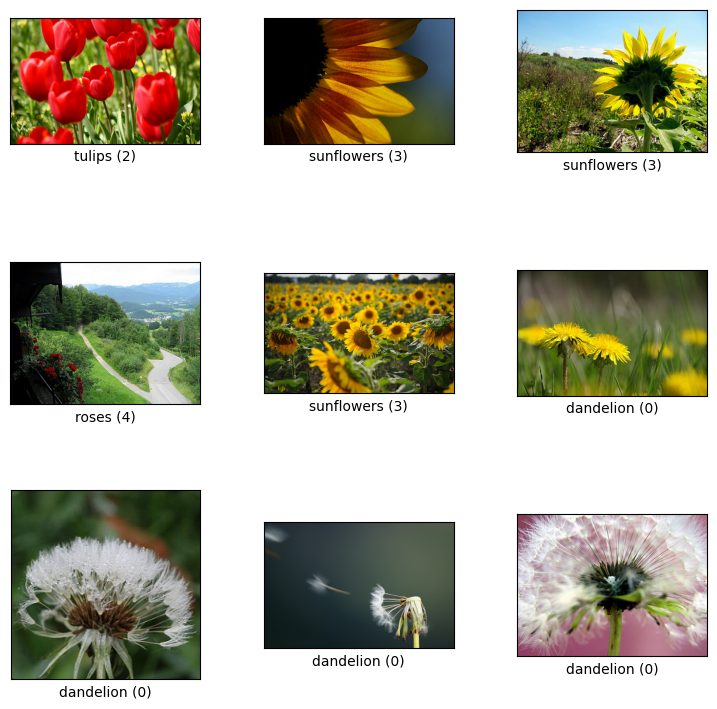

In [ ]:
fig = tfds.show_examples(flower_data, metadata)

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

In [ ]:
# defining constants
NUM_TRAINING_IMAGES = 3670
BATCH_SIZE = 32
SIZE = [64, 64]
EPOCHS = 20
num_folds = 5

In [ ]:
# resizing the image
def preprocess(image, lable):
    image = tf.image.resize(image, size=SIZE)
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = (image/255) ## Normalization
    return image, lable

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [ ]:
# Feature engineering for image augmentation (image rotation)
def augmentimages(image, label):
  image = tf.image.random_flip_left_right(image)
  return image, label

In [ ]:
tensor_image_preprocess, tensor_label_preprocess=[],[]

for x,y in list(zip(tensor_image, tensor_label)):
  new_x, new_y = preprocess(x,y)
  tensor_image_preprocess.append(new_x)
  tensor_label_preprocess.append(new_y)
  new_x, new_y = augmentimages(new_x, new_y)
  tensor_image_preprocess.append(new_x)
  tensor_label_preprocess.append(new_y)

## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [ ]:
 # Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)
 Features, Label = tensor_image_preprocess, tensor_label_preprocess

In [ ]:
# one-hot encoding target variable
tensor_one_hot_label_preprocess = []
for tensor_label_prep in tensor_label_preprocess:
  tensor_one_hot_label_preprocess.append(tf.one_hot(tensor_label_prep, depth = 5))

## 3.3 Split the data into training set and testing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tensor_image_preprocess, tensor_one_hot_label_preprocess, test_size=0.33, random_state=42)

In [ ]:
# converting to numpy array for training
X_train_numpy, X_test_numpy, y_train_numpy, y_test_numpy = np.array(X_train),np.array(X_test), np.array(y_train),np.array(y_test)

## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


In [ ]:
print('length of training set: ', len(X_train))
print('length of test set: ', len(X_test))

length of training set:  4917
length of test set:  2423


# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [ ]:
# Model Architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(SIZE[0], SIZE[0], 3)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation = 'softmax')
])

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers <br>
  - 7 layers
* Number of units in each layer <br>
  - flatten layer - 12288
  - dense layer - 512
  - dense_1 layer - 256
  - dense_2 layer - 128
  - dense_3 layer - 128
  - dense_4 layer - 64
  - dense_5 layer - 5
* Total number of trainable parameters <br>
  - 6,481,285



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 512)               6291968   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 5)                 3

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [ ]:
# using categorical_crossentropy since target labels are one-hot encoded.
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [ ]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

In [ ]:
fold_no = 1
# Define per-fold score containers
acc_per_fold, loss_per_fold, val_acc_per_fold, val_loss_per_fold = [],[],[],[]

for train, test in kfold.split(X_train_numpy,y_train_numpy):
  history = model.fit(
    X_train_numpy[train],y_train_numpy[train],
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2
  )
  fold_no += 1
  scores = model.evaluate(X_train_numpy[test], y_train_numpy[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.extend(history.history['accuracy'])
  loss_per_fold.extend(history.history['loss'])
  val_acc_per_fold.extend(history.history['val_accuracy'])
  val_loss_per_fold.extend(history.history['val_loss'])


Epoch 1/20
99/99 [==============================] - 3s 10ms/step - loss: 1.6719 - accuracy: 0.2438 - val_loss: 1.6302 - val_accuracy: 0.2211
Epoch 2/20
99/99 [==============================] - 1s 7ms/step - loss: 1.6253 - accuracy: 0.2444 - val_loss: 1.6105 - val_accuracy: 0.2211
Epoch 3/20
99/99 [==============================] - 1s 6ms/step - loss: 1.6092 - accuracy: 0.2489 - val_loss: 1.6024 - val_accuracy: 0.2274
Epoch 4/20
99/99 [==============================] - 1s 6ms/step - loss: 1.6005 - accuracy: 0.2502 - val_loss: 1.5977 - val_accuracy: 0.2300
Epoch 5/20
99/99 [==============================] - 1s 7ms/step - loss: 1.5941 - accuracy: 0.2530 - val_loss: 1.5935 - val_accuracy: 0.2300
Epoch 6/20
99/99 [==============================] - 1s 6ms/step - loss: 1.5887 - accuracy: 0.2565 - val_loss: 1.5900 - val_accuracy: 0.2313
Epoch 7/20
99/99 [==============================] - 1s 7ms/step - loss: 1.5838 - accuracy: 0.2552 - val_loss: 1.5865 - val_accuracy: 0.2351
Epoch 8/20
99/99 [=

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


optimizer hyperparameter

Learning Rate: The learning rate (0.00001 in this case) determines the step size at each iteration while updating the model parameters. A low learning rate indicates small updates, which can help converge the model slowly but with potentially better precision. It's a hyperparameter that needs careful tuning based on the problem and the dataset.

Momentum: The momentum (0.9 in this case) is a value between 0 and 1 that adds a fraction of the previous update vector to the current update. It helps the optimizer to accelerate convergence, especially in the presence of high curvature, small but consistent gradients, or noisy gradients. A higher momentum value means the optimizer relies more on the historical update information, which can help overcome local minima and achieve faster convergence.

# 6. Test the model - 0.5 marks


In [ ]:
##---------Type the code below this line------------------##
image_batch, label_batch = X_test_numpy, y_test_numpy
predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch,  axis=1)
class_names = np.array(metadata.features['label'].names)
predicted_class_names = class_names[predicted_ids]

76/76 [==============================] - 0s 2ms/step


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


<Axes: title={'center': 'training and validation accuracy history.'}>

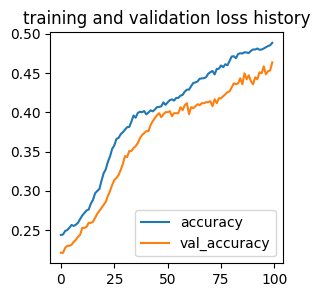

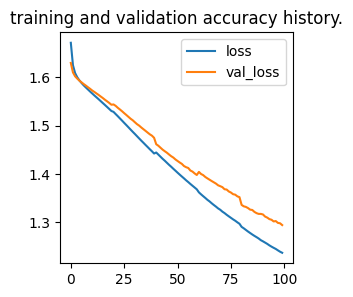

In [ ]:
history_frame_acc = pd.DataFrame({'accuracy':acc_per_fold, 'val_accuracy':val_acc_per_fold})
history_frame_loss = pd.DataFrame({'loss':loss_per_fold, 'val_loss':val_loss_per_fold})
history_frame_acc.plot(title='training and validation loss history',figsize=(3, 3))
history_frame_loss.plot(title='training and validation accuracy history.', figsize=(3, 3))

In [ ]:
# testing accuracy and loss.
y_test_original = np.argmax(y_test,  axis=1)
accuracy = accuracy_score(y_test_original, predicted_ids)
print(f"testing Accuracy = {accuracy.round(4)}")

testing Accuracy = 0.456


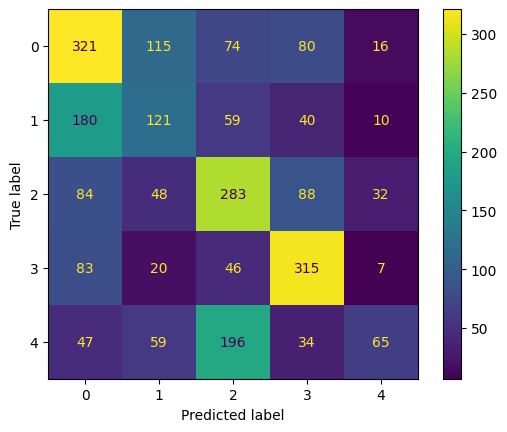

In [ ]:
# confusion matrix plot
cm = confusion_matrix(y_test_original, predicted_ids)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
# calculating precision, recall and F1 score
y_test = y_test_original
y_pred = predicted_ids
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1score = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy = {accuracy.round(4)}")
print(f"Precision = {precision.round(4)}")
print(f"Recall = {recall.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 0.456
Precision = 0.4563
Recall = 0.456
F1 Score = 0.4389


# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [ ]:
## By decresing one layer

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(SIZE[0], SIZE[0], 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation = 'softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.00001,momentum=0.9),
    # loss='sparse_categorical_crossentropy', # labels are integers 0-4
    loss='categorical_crossentropy', # labels are one-hot encoded vector
    metrics=['accuracy']
)

fold_no = 1
# Define per-fold score containers
acc_per_fold, loss_per_fold, val_acc_per_fold, val_loss_per_fold = [],[],[],[]

for train, test in kfold.split(X_train_numpy,y_train_numpy):
  history = model.fit(
    X_train_numpy[train],y_train_numpy[train],
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2
  )
  fold_no += 1
  scores = model.evaluate(X_train_numpy[test], y_train_numpy[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.extend(history.history['accuracy'])
  loss_per_fold.extend(history.history['loss'])
  val_acc_per_fold.extend(history.history['val_accuracy'])
  val_loss_per_fold.extend(history.history['val_loss'])

Epoch 1/20
99/99 [==============================] - 1s 7ms/step - loss: 1.6253 - accuracy: 0.2352 - val_loss: 1.6060 - val_accuracy: 0.2173
Epoch 2/20
99/99 [==============================] - 0s 5ms/step - loss: 1.5808 - accuracy: 0.2635 - val_loss: 1.5886 - val_accuracy: 0.2414
Epoch 3/20
99/99 [==============================] - 0s 4ms/step - loss: 1.5604 - accuracy: 0.2982 - val_loss: 1.5722 - val_accuracy: 0.2846
Epoch 4/20
99/99 [==============================] - 0s 4ms/step - loss: 1.5413 - accuracy: 0.3198 - val_loss: 1.5560 - val_accuracy: 0.2846
Epoch 5/20
99/99 [==============================] - 1s 5ms/step - loss: 1.5238 - accuracy: 0.3338 - val_loss: 1.5410 - val_accuracy: 0.2948
Epoch 6/20
99/99 [==============================] - 0s 5ms/step - loss: 1.5076 - accuracy: 0.3535 - val_loss: 1.5256 - val_accuracy: 0.2973
Epoch 7/20
99/99 [==============================] - 0s 5ms/step - loss: 1.4929 - accuracy: 0.3595 - val_loss: 1.5120 - val_accuracy: 0.3024
Epoch 8/20
99/99 [==

<Axes: title={'center': 'training and validation accuracy history.'}>

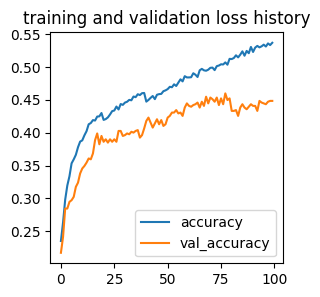

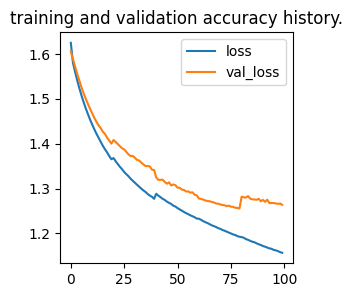

In [ ]:
history_frame_acc = pd.DataFrame({'accuracy':acc_per_fold, 'val_accuracy':val_acc_per_fold})
history_frame_loss = pd.DataFrame({'loss':loss_per_fold, 'val_loss':val_loss_per_fold})
history_frame_acc.plot(title='training and validation loss history',figsize=(3, 3))
history_frame_loss.plot(title='training and validation accuracy history.', figsize=(3, 3))

In [ ]:
## By increasing one layer

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(SIZE[0], SIZE[0],3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation = 'softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.00001,momentum=0.9),
    # loss='sparse_categorical_crossentropy', # labels are integers 0-4
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fold_no = 1
# Define per-fold score containers
acc_per_fold, loss_per_fold, val_acc_per_fold, val_loss_per_fold = [],[],[],[]

for train, test in kfold.split(X_train_numpy,y_train_numpy):
  history = model.fit(
    X_train_numpy[train],y_train_numpy[train],
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2
  )
  fold_no += 1
  scores = model.evaluate(X_train_numpy[test], y_train_numpy[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.extend(history.history['accuracy'])
  loss_per_fold.extend(history.history['loss'])
  val_acc_per_fold.extend(history.history['val_accuracy'])
  val_loss_per_fold.extend(history.history['val_loss'])


Epoch 1/20
99/99 [==============================] - 2s 9ms/step - loss: 1.6451 - accuracy: 0.2098 - val_loss: 1.6591 - val_accuracy: 0.1919
Epoch 2/20
99/99 [==============================] - 1s 6ms/step - loss: 1.6238 - accuracy: 0.2292 - val_loss: 1.6413 - val_accuracy: 0.2160
Epoch 3/20
99/99 [==============================] - 1s 5ms/step - loss: 1.6121 - accuracy: 0.2495 - val_loss: 1.6302 - val_accuracy: 0.2300
Epoch 4/20
99/99 [==============================] - 1s 6ms/step - loss: 1.6030 - accuracy: 0.2753 - val_loss: 1.6218 - val_accuracy: 0.2478
Epoch 5/20
99/99 [==============================] - 1s 6ms/step - loss: 1.5956 - accuracy: 0.2848 - val_loss: 1.6149 - val_accuracy: 0.2567
Epoch 6/20
99/99 [==============================] - 1s 7ms/step - loss: 1.5892 - accuracy: 0.2982 - val_loss: 1.6086 - val_accuracy: 0.2668
Epoch 7/20
99/99 [==============================] - 1s 7ms/step - loss: 1.5835 - accuracy: 0.3010 - val_loss: 1.6033 - val_accuracy: 0.2630
Epoch 8/20
99/99 [==

<Axes: title={'center': 'training and validation accuracy history.'}>

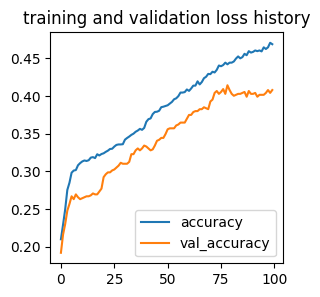

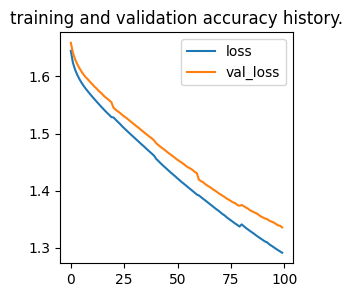

In [ ]:
history_frame_acc = pd.DataFrame({'accuracy':acc_per_fold, 'val_accuracy':val_acc_per_fold})
history_frame_loss = pd.DataFrame({'loss':loss_per_fold, 'val_loss':val_loss_per_fold})
history_frame_acc.plot(title='training and validation loss history',figsize=(3, 3))
history_frame_loss.plot(title='training and validation accuracy history.', figsize=(3, 3))

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [ ]:
## Dropout of ratio 0.25
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(SIZE[0], SIZE[0],3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation = 'softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9),
    # loss='sparse_categorical_crossentropy', # labels are integers 0-4
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fold_no = 1
# Define per-fold score containers
acc_per_fold, loss_per_fold, val_acc_per_fold, val_loss_per_fold = [],[],[],[]

for train, test in kfold.split(X_train_numpy,y_train_numpy):
  history = model.fit(
    X_train_numpy[train],y_train_numpy[train],
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2
  )
  fold_no += 1
  scores = model.evaluate(X_train_numpy[test], y_train_numpy[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.extend(history.history['accuracy'])
  loss_per_fold.extend(history.history['loss'])
  val_acc_per_fold.extend(history.history['val_accuracy'])
  val_loss_per_fold.extend(history.history['val_loss'])


Epoch 1/20
99/99 [==============================] - 1s 7ms/step - loss: 1.6424 - accuracy: 0.1961 - val_loss: 1.5980 - val_accuracy: 0.2313
Epoch 2/20
99/99 [==============================] - 1s 5ms/step - loss: 1.6120 - accuracy: 0.2209 - val_loss: 1.5846 - val_accuracy: 0.2643
Epoch 3/20
99/99 [==============================] - 1s 8ms/step - loss: 1.6007 - accuracy: 0.2381 - val_loss: 1.5754 - val_accuracy: 0.2834
Epoch 4/20
99/99 [==============================] - 1s 8ms/step - loss: 1.5874 - accuracy: 0.2527 - val_loss: 1.5688 - val_accuracy: 0.3062
Epoch 5/20
99/99 [==============================] - 1s 7ms/step - loss: 1.5784 - accuracy: 0.2661 - val_loss: 1.5635 - val_accuracy: 0.3215
Epoch 6/20
99/99 [==============================] - 1s 7ms/step - loss: 1.5704 - accuracy: 0.2800 - val_loss: 1.5573 - val_accuracy: 0.3202
Epoch 7/20
99/99 [==============================] - 1s 5ms/step - loss: 1.5648 - accuracy: 0.2902 - val_loss: 1.5522 - val_accuracy: 0.3240
Epoch 8/20
99/99 [==

<Axes: title={'center': 'training and validation accuracy history.'}>

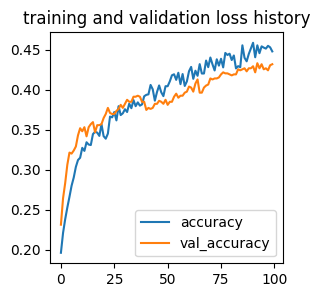

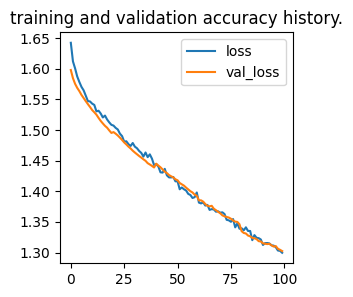

In [ ]:
history_frame_acc = pd.DataFrame({'accuracy':acc_per_fold, 'val_accuracy':val_acc_per_fold})
history_frame_loss = pd.DataFrame({'loss':loss_per_fold, 'val_loss':val_loss_per_fold})
history_frame_acc.plot(title='training and validation loss history',figsize=(3, 3))
history_frame_loss.plot(title='training and validation accuracy history.', figsize=(3, 3))

In [ ]:
## Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(SIZE[0], SIZE[0] ,3)),
  tf.keras.layers.Dense(128, activation='relu',bias_regularizer=regularizers.L2(1e-4)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation = 'softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9),
    # loss='sparse_categorical_crossentropy', # labels are integers 0-4
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
fold_no = 1
# Define per-fold score containers
acc_per_fold, loss_per_fold, val_acc_per_fold, val_loss_per_fold = [],[],[],[]

for train, test in kfold.split(X_train_numpy,y_train_numpy):
  history = model.fit(
    X_train_numpy[train],y_train_numpy[train],
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2
  )
  fold_no += 1
  scores = model.evaluate(X_train_numpy[test], y_train_numpy[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.extend(history.history['accuracy'])
  loss_per_fold.extend(history.history['loss'])
  val_acc_per_fold.extend(history.history['val_accuracy'])
  val_loss_per_fold.extend(history.history['val_loss'])

Epoch 1/20
99/99 [==============================] - 2s 9ms/step - loss: 1.6530 - accuracy: 0.2085 - val_loss: 1.5968 - val_accuracy: 0.2478
Epoch 2/20
99/99 [==============================] - 1s 6ms/step - loss: 1.5977 - accuracy: 0.2521 - val_loss: 1.5763 - val_accuracy: 0.2910
Epoch 3/20
99/99 [==============================] - 1s 5ms/step - loss: 1.5851 - accuracy: 0.2629 - val_loss: 1.5673 - val_accuracy: 0.3037
Epoch 4/20
99/99 [==============================] - 0s 5ms/step - loss: 1.5736 - accuracy: 0.2842 - val_loss: 1.5582 - val_accuracy: 0.3139
Epoch 5/20
99/99 [==============================] - 1s 6ms/step - loss: 1.5642 - accuracy: 0.2905 - val_loss: 1.5501 - val_accuracy: 0.3062
Epoch 6/20
99/99 [==============================] - 1s 5ms/step - loss: 1.5556 - accuracy: 0.2966 - val_loss: 1.5418 - val_accuracy: 0.3151
Epoch 7/20
99/99 [==============================] - 1s 5ms/step - loss: 1.5468 - accuracy: 0.3207 - val_loss: 1.5346 - val_accuracy: 0.3227
Epoch 8/20
99/99 [==

<Axes: title={'center': 'training and validation accuracy history.'}>

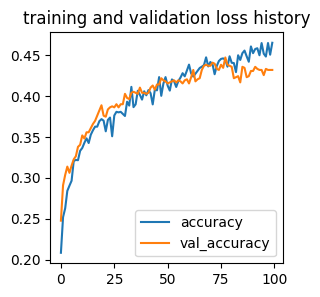

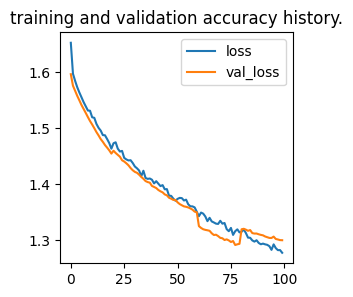

In [ ]:
history_frame_acc = pd.DataFrame({'accuracy':acc_per_fold, 'val_accuracy':val_acc_per_fold})
history_frame_loss = pd.DataFrame({'loss':loss_per_fold, 'val_loss':val_loss_per_fold})
history_frame_acc.plot(title='training and validation loss history',figsize=(3, 3))
history_frame_loss.plot(title='training and validation accuracy history.', figsize=(3, 3))

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [ ]:
## RMSProp optimizer
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(SIZE[0], SIZE[0] ,3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation = 'softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001, momentum=0.9),
    # loss='sparse_categorical_crossentropy', # labels are integers 0-4
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fold_no = 1
# Define per-fold score containers
acc_per_fold, loss_per_fold, val_acc_per_fold, val_loss_per_fold = [],[],[],[]

for train, test in kfold.split(X_train_numpy,y_train_numpy):
  history = model.fit(
    X_train_numpy[train],y_train_numpy[train],
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2
  )
  fold_no += 1
  scores = model.evaluate(X_train_numpy[test], y_train_numpy[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.extend(history.history['accuracy'])
  loss_per_fold.extend(history.history['loss'])
  val_acc_per_fold.extend(history.history['val_accuracy'])
  val_loss_per_fold.extend(history.history['val_loss'])

Epoch 1/20
99/99 [==============================] - 2s 8ms/step - loss: 1.4596 - accuracy: 0.3601 - val_loss: 1.3513 - val_accuracy: 0.3952
Epoch 2/20
99/99 [==============================] - 1s 6ms/step - loss: 1.2798 - accuracy: 0.4625 - val_loss: 1.2836 - val_accuracy: 0.4536
Epoch 3/20
99/99 [==============================] - 0s 5ms/step - loss: 1.2126 - accuracy: 0.5010 - val_loss: 1.2733 - val_accuracy: 0.4396
Epoch 4/20
99/99 [==============================] - 1s 5ms/step - loss: 1.1661 - accuracy: 0.5140 - val_loss: 1.2270 - val_accuracy: 0.4752
Epoch 5/20
99/99 [==============================] - 1s 5ms/step - loss: 1.1364 - accuracy: 0.5401 - val_loss: 1.2332 - val_accuracy: 0.4676
Epoch 6/20
99/99 [==============================] - 1s 6ms/step - loss: 1.0839 - accuracy: 0.5617 - val_loss: 1.1975 - val_accuracy: 0.4740
Epoch 7/20
99/99 [==============================] - 1s 5ms/step - loss: 1.0429 - accuracy: 0.6039 - val_loss: 1.1695 - val_accuracy: 0.5172
Epoch 8/20
99/99 [==

In [ ]:
# ADAM optimizer
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(SIZE[0], SIZE[0], 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation = 'softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    # loss='sparse_categorical_crossentropy', # labels are integers 0-4
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
fold_no = 1
# Define per-fold score containers
acc_per_fold, loss_per_fold, val_acc_per_fold, val_loss_per_fold = [],[],[],[]

for train, test in kfold.split(X_train_numpy,y_train_numpy):
  history = model.fit(
    X_train_numpy[train],y_train_numpy[train],
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2
  )
  fold_no += 1
  scores = model.evaluate(X_train_numpy[test], y_train_numpy[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.extend(history.history['accuracy'])
  loss_per_fold.extend(history.history['loss'])
  val_acc_per_fold.extend(history.history['val_accuracy'])
  val_loss_per_fold.extend(history.history['val_loss'])

Epoch 1/20
99/99 [==============================] - 3s 8ms/step - loss: 1.5781 - accuracy: 0.2842 - val_loss: 1.5238 - val_accuracy: 0.3329
Epoch 2/20
99/99 [==============================] - 1s 6ms/step - loss: 1.4656 - accuracy: 0.3967 - val_loss: 1.4285 - val_accuracy: 0.3990
Epoch 3/20
99/99 [==============================] - 1s 6ms/step - loss: 1.3763 - accuracy: 0.4336 - val_loss: 1.3553 - val_accuracy: 0.4295
Epoch 4/20
99/99 [==============================] - 1s 6ms/step - loss: 1.3135 - accuracy: 0.4568 - val_loss: 1.3210 - val_accuracy: 0.4130
Epoch 5/20
99/99 [==============================] - 1s 7ms/step - loss: 1.2701 - accuracy: 0.4739 - val_loss: 1.2978 - val_accuracy: 0.4028
Epoch 6/20
99/99 [==============================] - 1s 8ms/step - loss: 1.2366 - accuracy: 0.4933 - val_loss: 1.2736 - val_accuracy: 0.4307
Epoch 7/20
99/99 [==============================] - 1s 8ms/step - loss: 1.2126 - accuracy: 0.5016 - val_loss: 1.2606 - val_accuracy: 0.4600
Epoch 8/20
99/99 [==

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


# Observations
Using the different strategies we have observered the following results:
1. 5 Fold cross validation with Stochastic gradient (setting learning rate 0.00001 and momentum 0.9) getting accuracy of approximately 45%
2. 5 Fold cross validation with Stochastic gradient (setting learning rate 0.00001 and momentum 0.9) and decreasing one layer getting accuracy of 50.25%
3. 5 Fold cross validation with Stochastic gradient (setting learning rate 0.00001 and momentum 0.9) and increasing one layer getting accuracy of 45.77%
4. 5 Fold cross validation with Stochastic gradient (setting learning rate 0.00001, momentum 0.9 and using dropout 0.25) getting accuracy of 48.72%
5. 5 Fold cross validation with Stochastic gradient (setting learning rate 0.00001 and momentum 0.9, using dropout 0.25 and L2 regularization 1e-04) getting accuracy of approximately 49.13%
6. 5 Fold cross validation with RMS (setting learning rate 0.00001, momentum 0.9) getting accuracy of approximately 85.04%
7. 5 Fold cross validation with ADAM (setting learning rate 0.00001) getting accuracy of 84.33%


Using RMS with additional hyperparameter momentum gives the best accuracy in our case.